# Genetic Algorithm - CW2

This code was created from scratch

### Install and import libaries 

In [1]:
# Install optproblems libary 

!pip install optproblems

In [2]:
import numpy as np 
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import optproblems 
from optproblems import cec2005
from random import random 
from random import seed
from random import randint

### Genetic Algorithm Class

This class contains the hyperparameters and functions required to perform the steps in the GA. It also contains a display function for GA's with a solution size of 2. 

In [3]:
# Genetic Algorithm Class 

class GA: 

  def __init__(self, popSize, solnSize, bound, k, func):     # Constructor
    
    self.popSize = popSize        # the population size of the generation 
    self.solnSize = solnSize      # the solution size for each solution in the generation
    self.bound = bound            # the upper/lower bound of the function
    self.k = k                    # the number of solutions used in a round of tournament selections
    self.func = func              # the optproblems function 
    self.initGen = []             # the initial generation of solutions stored in a list
    self.currentGen = []          # the current generation of solutions stored in a list
    self.fitList = []             # the fitness values of the current generation of solutions in a list
    self.parentSel = []           # the list of parent solutions generated from tournament selection
    self.bestSoln = []            # the best solution's phenome stored in a list

    ans = self.func.get_optimal_solutions()     # get list of optimal solutions 
    optSoln = ans[0]                            # store first (and normally only?) optimal solution 
    self.func.evaluate(optSoln)                 # evaluate the optimal solution 
    self.optSoln = optSoln                      # store the optimal solution 


  def createGenOptLib(self):                  # create initial population of random solutions using the hyperparameters 

    for i in range(self.popSize):                                     # for each member of the population
      soln = []                                                       # initialise list for a solution 
      for j in range(self.solnSize):                                  # for each element of the solution 
	      soln.append(round((random()*2*self.bound - self.bound), 4))   # generate a random number within the bounds of the problem with 4dp (like optproblems) 
      idiv = optproblems.Individual(soln)                             # create an instance of individual from optproblems with the solution generated above
      self.initGen.append(idiv)                                       # append the individual containing the solution as a phenome to the list of solutions

    self.currentGen = self.initGen                                    # store the initial solutions 
  

  def fitnessOptLib(self):                                  # assess the fitness of the functions 
  
    # idea - fitness = 1/|(x + y + z - t)| where t is the optimal x, y and z summed 
    # https://towardsdatascience.com/how-to-define-a-fitness-function-in-a-genetic-algorithm-be572b9ea3b4
  
    self.func.batch_evaluate(self.currentGen)               # evaluate z for the population 
  
    self.fitList = []                                       # ensure the list is empty 

    t = self.optSoln.objective_values                       # add value of z to the sum of the optimal solution's parts
    
    for k in range(self.solnSize):                          # for each element in the optimal solution 
      t += self.optSoln.phenome[k]                          # add the element to the sum of the optimal solution's parts

    for i in range(self.popSize):                           # for each solution in the current generation 
      sum = self.currentGen[i].objective_values             # add value of z to the sum of the current solution's parts
      for j in range(self.solnSize):                        # for each element in the solution 
        sum += self.currentGen[i].phenome[j]                # add the element to the sum of the current solution's parts
      
      self.fitList.append(1/abs(sum - t))                   # calculate and store the solution's fitness to the list of fitness values 



  def tourSelOptLib(self):         # get a list of parent solutions using tournament selection 
  
    maxIndex = len(self.fitList)-1                            # calculate the maximum index value

    for j in range(self.popSize):                             # ensure the generation size stays the same by selecting the same number of parent soluntions  
      best = -1                                               # set the best fitness value to be negative 
      bestIndex = -1                                          # set the index which is used to get the fittest solution from the selection list
      newRandIndex = []                                       # list to remember which indexes have been used in the selection  
    
      for i in range(self.k):                                 # for each soln in selection k 
        index = randint(0, maxIndex)                          # get random soln index to pick a solution
      
        if newRandIndex.count(index):                         # make sure there are no duplicate solutions in the selection
          i -= 1                                              # if there, go back and pick a new index 
        else:
          newRandIndex.append(index)                          # add index of this solution to list of indexes for this selection 
          if best <= self.fitList[index]:                     # checks if it is the fittest solution in the selection
            best = self.fitList[index]                        # makes it the new best fitness for this selection 
            bestIndex = index                                 # remembers the new best index for this selection
    
      self.parentSel.append(self.currentGen[bestIndex])       # add the best solution of the selection to list of parents 



  def onePtrCrsOptLib(self):                # specify how much of the parent you want left behind

    ng = []                                                 # list to hold children solutions

    for i in range(0, self.popSize-1, 2):                   # for each pair of parents

      crsPt = randint(0, self.popSize-1)                    # generate a random crossover point 

      parent1 = self.parentSel[i].phenome                   # get first parent solution from solution list
      parent2 = self.parentSel[i+1].phenome                 # get seccond parent solution from solution list

      newStart1 = parent1[0:crsPt]                          # get start of first parent solution
      newStart2 = parent2[0:crsPt]                          # get start of second parent solution

      newEnd1 = parent1[crsPt::]                            # get end of first parent solution
      newEnd2 = parent2[crsPt::]                            # get end of second parent solution

      child1 = optproblems.Individual(newStart1 + newEnd2)  # create child with start of first parent and end of second parent
      child2 = optproblems.Individual(newStart2 + newEnd1)  # create child with start of second parent and end of first parent

      ng.append(child1)                                     # add new child to list of new child population
      ng.append(child2)                                     # add new child to list of new child population
      
    self.currentGen = ng                                    # update the current generation 


  def mutateOptLib(self):                      # mutate the new generation 

    for i in range(self.popSize):                                                                              # for each solution in the population
      self.currentGen[i].phenome[randint(0, self.solnSize-1)] = round((random()*2*self.bound - self.bound), 4) # must it ensure the child always be mutated?



  def getBestSoln(self):                          # get the best soltion of the generation 
    
    self.fitnessOptLib()                          # get fitness of each solution in the generation 
    maxFit = max(self.fitList)                    # get the fittest value
    maxFitIndex = self.fitList.index(maxFit)      # get the index of the fittest solution 
    
    self.bestSoln = self.currentGen[maxFitIndex].phenome  # store the best solution 
    
    # print statements 
    print("The fittest solution was: ", self.bestSoln)   
    print("The optimal solution was: ", self.optSoln.phenome)


  def display(self):              # display the solution on a graph (iff solution size is 2)
    ## plot from blog 

    boundT = 2*self.bound

    # initialise two 2D arrays to represent the x and y coordinates for the graph of the function from optproblems 
    x, y = np.array(np.meshgrid(np.linspace(-self.bound,self.bound,boundT), np.linspace(-self.bound,self.bound,boundT)))

    # creates a 2D array to store the function result to be graphed 
    z = np.zeros([boundT, boundT])


    for i in range(boundT):                                             # for every row 
      for j in range(boundT):                                           # for every element
        plotSoln = optproblems.Individual(np.array([x[i][j], y[i][j]])) # create a solution using the coordinates
        self.func.evaluate(plotSoln)                                    # evaluate the solution
        z[i][j] = plotSoln.objective_values                             # add the evaluation of the solution to z

    # set up arrays for scattering the first and final generations on the graph
    xFirst = np.zeros(self.popSize)                                          
    yFirst = np.zeros(self.popSize)
    xFinal = np.zeros(self.popSize) 
    yFinal = np.zeros(self.popSize)

    # get the coordinates for the first generation 
    for i in range(self.popSize):
      xFirst[i] = self.initGen[i].phenome[0]
      yFirst[i] = self.initGen[i].phenome[1]

    # get the coordinates for the last generation 
    for i in range(self.popSize):
      xFinal[i] = self.currentGen[i].phenome[0]
      yFinal[i] = self.currentGen[i].phenome[1]

    # get the coordinates of the optimal(smallest) point on the function
    x_min = x.reshape(-1)[z.argmin()]     # flatten the array of x coordinates and find the value with the same index as to the smallest value of z 
    y_min = y.reshape(-1)[z.argmin()]     # flatten the array of y coordinates and find the value with the same index as to the smallest value of z 

    # adjust the size of the plot in inches 
    #plt.figure(figsize=(8,6))

    # plot the image of the function from optproblems within the bounds supplied 
    plt.imshow(z, extent=[-self.bound, self.bound, -self.bound, self.bound], origin='lower', cmap='PuBuGn', alpha=1)

    # display the colourbar to illustrate the depth (z)
    plt.colorbar()

    # plot the optimal solution with a black x
    plt.plot([x_min], [y_min], marker='x', markersize=5, color="black", label="Optimal")

    # plot the best solution with a black triange
    plt.plot(self.bestSoln[0], self.bestSoln[1], marker='^', markersize=5, color="black", label="Best")

    # plot the contours of the function 
    contours = plt.contour(x, y, z, colors='black', alpha=0.4)
    plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

    # plot the coordinates which represent the solutions from the first generation 
    plt.scatter(xFirst, yFirst, 5, c="orange", label="first generation")

    # plot the coordinates which represent the solutions from the last generation   
    plt.scatter(xFinal, yFinal, 5, c="red", label="last generation")

    # show the legend
    plt.legend()

    # show the graph
    plt.show()

# Class used to run the genetic algorithm 

class Run():

  def run(self, maxGen, GA): 

    GA.createGenOptLib()         # create initial solution 
    
    i = 0

    while i<maxGen:
      
      GA.fitnessOptLib()         # fitness 
      GA.tourSelOptLib()         # tournament selection 
      GA.onePtrCrsOptLib()       # crossover
      GA.mutateOptLib()          # mutate

      i += 1                     # increment counter 

      if GA.currentGen.count(GA.optSoln):                            # if optimum solution has been found
        print("soln found")
        break
      elif i==maxGen:                                  # if max number of generations has been reached
        print("MAXIMUM NUMBER OF GENERATIONS REACHED")
        GA.getBestSoln()
        break
    
    if GA.solnSize == 2:
      GA.display()

    print("DONE")


In [4]:
funcMain = optproblems.cec2005.F1(10)
newGA = GA(1000, 10, 100, 100, funcMain)

r = Run()
r.run(200, newGA)

MAXIMUM NUMBER OF GENERATIONS REACHED
The fittest solution was:  [-20.1054, 22.2297, -60.9837, -77.5061, -30.4674, -69.3584, -18.7999, 3.445, 96.7195, 19.2315]
The optimal solution was:  [-39.3119, 58.8999, -46.3224, -74.6515, -16.7997, -80.5441, -10.5935, 24.9694, 89.8384, 9.1119]
DONE


TODO: comand line prompts? 

# STOP HERE

Rest is old code and tests - ignore

In [5]:
# FUNCTIONS - IGNORE


def createGenOptLib(popSize, solnSize, bound):                  # create initial population of random solutions using the hyperparameters 

  gen = []                                                # initialise list of solutions 
  for i in range(popSize):                                # for each member of the population
    soln = []                                             # initialise list for a solution 
    for j in range(solnSize):                             # for each element of the solution 
	    soln.append(round((random()*2*bound - bound), 4))   # generate a random number within the bounds of the problem and 
    idiv = optproblems.Individual(soln)                   # create an instance of individual from optproblems 
    gen.append(idiv)                                      # append the individual containing the solution as a phenome to the list of solutions
  return gen                                              # return the list of solutions


def fitnessOptLib(gen, bound, func):                                      # assess the fitness of the functions 
  
  # idea - fitness = 1/|(x + y + z - t)| where t is the optimal x, y and z summed 
  # https://towardsdatascience.com/how-to-define-a-fitness-function-in-a-genetic-algorithm-be572b9ea3b4
  
  func.batch_evaluate(gen)               # evaluate z for the population 
  ans = func.get_optimal_solutions()    # get list of optimal solutions 
  optSoln = ans[0]                      # store first (and normally only?) optimal solution 
  func.evaluate(optSoln)                # evaluate the optimal solution 
  
  popSize = len(gen)                    # get size of population 
  solnSize = len(gen[0].phenome)        # get size of solution 
  fit = []                              # list to store fitness values for each solution 

  t = optSoln.objective_values          # add value of z to the sum
  for k in range(solnSize):             # for each element in the solution 
    t += optSoln.phenome[k]             # add xj to the sum 

  for i in range(popSize):              # for each solution 
    sum = gen[i].objective_values       # add value of z to the sum
    for j in range(solnSize):           # for each element in the solution 
      sum += gen[i].phenome[j]          # add xj to the sum 
    fit.append(1/abs(sum - t))          # add the solution's fitness to the list of fitness values 

  return fit                            # return list of fitness values 


def tourSelOptLib(gen, k, fit):         # get a list of parent solutions using tournament selection 
  
  popSize = len(gen)                    # size of generation 
  pf = []                               # list to store fitness of parents (for testing)
  pg = []                               # list to store the selection of parents from tournement selection
  
  for j in range(popSize):              # ensure the generation size stays the same by selecting the same number of parent soluntions  
    best = -1                           # set the best fitness value to be negative 
    bestIndex = -1                      # set the index which is used to get the fittest solution from the selection list
    newRandIndex = []                   # list to remember which indexes have been used in the selection  
    
    for i in range(k):                  # for each soln in selection k 
      index = randint(0, len(fit)-1)    # get random soln index to pick a solution
      
      if newRandIndex.count(index):     # make sure there are no duplicate solutions in the selection
        i -= 1                          # if there, go back and pick a new index 
      else:
        newRandIndex.append(index)      # add index of this solution to list of indexes for this selection 
        if best <= fit[index]:          # checks if it is the fittest solution in the selection
          best = fit[index]             # makes it the new best fitness for this selection 
          bestIndex = index             # remembers the new best index for this selection
    
    pf.append(fit[bestIndex])           # add the best fitness of the selection to list of parents
    pg.append(gen[bestIndex])           # add the best solution of the selection to list of parents 

  return pg, pf                         # return the list of parents and the list of their fitnesses


def onePtrCrsOptLib(pg):                # specify how much of the parent you want left behind
  
  popSize = len(pg)
  ng = []                               # list to hold children

  for i in range(0, popSize-1, 2):      # for each pair of parents

    crsPt = randint(0, popSize-1)       # generate a random crossover point 

    parent1 = pg[i].phenome             # get first parent solution from solution list
    parent2 = pg[i].phenome             # get seccond parent solution from solution list

    newStart1 = parent1[0:crsPt]        # get start of first parent solution
    newStart2 = parent2[0:crsPt]        # get start of second parent solution

    newEnd1 = parent1[crsPt::]          # get end of first parent solution
    newEnd2 = parent2[crsPt::]          # get end of second parent solution

    child1 = optproblems.Individual(newStart1 + newEnd2)     # create child with start of first parent and end of second parent
    child2 = optproblems.Individual(newStart2 + newEnd1)     # create child with start of second parent and end of first parent

    ng.append(child1)                   # add new child to list of new child population
    ng.append(child2)                   # add new child to list of new child population

  return ng                             # return new child generation 



def mutateOptLib(ng, dim):              # mutate the new generation 
  
  popSize = len(ng)                     # get the size of the population 
  solnSize = len(ng[0].phenome)

  for i in range(popSize):              # for each solution in the population
    ng[i].phenome[randint(0, solnSize-1)] = round((random()*2*dim - dim), 4) # must it ensure the child always be mutated?

  return ng                             # return new mutated population 



In [6]:
# pre class main - IGNORE

popSize = 100
solnSize = 2
bound = 100
gen1 = createGenOptLib(popSize, solnSize, bound)
gen2 = gen1

genList = []

for i in range(len(gen1)):
  genList.append(gen1[i].phenome)

print(genList)

#optSoln = [0, 0, 0, 0, 0]
func = optproblems.cec2005.F1(2)  
optS = func.get_optimal_solutions()
print(optS[0].phenome)
func.evaluate(optS[0])
print(optS[0].objective_values)
maxGen = 1000
i = 0
fit1 = []
print(fit1)
while i<= maxGen and gen1.count(optS)==0:
  #gen1.pop(-1)
  #gen1.append(optSoln)
  fit1 = fitnessOptLib(gen1, bound, func)         #get fitness using libary 
  pg1, pf1 = tourSelOptLib(gen1, 5, fit1)         #tournament selection 
  ng = onePtrCrsOptLib(pg1)                       #crossover
  gen1 = mutateOptLib(ng, bound)                  #mutate
  
  i += 1                                          #increment counter 
  
  if gen1.count(optS):                            # if optimum solution has been found
#    print(i)
#    print(gen1)
#    print(fit1)
    print("soln found")
  elif i>maxGen:                                  # if max number of generations has been reached
#    print(i)
#    print(gen1)
#    print(fit1)
    print("max gen reached")

#genList = []
#genList2 = []
#func.batch_evaluate(gen1)
#for i in range(len(gen1)):
#  genList.append(gen1[i].phenome)
#  genList2.append(gen1[i].objective_values)
#print(genList)
#print(genList2)

[[-40.0452, -2.6675], [19.2033, 10.5216], [69.4871, -52.1756], [-77.0423, -95.248], [44.4823, -80.823], [-68.8593, -12.562], [-15.7708, 21.445], [-5.364, 27.6601], [34.5889, -28.5431], [7.6997, -81.9712], [-87.3621, -77.92], [-47.5614, 79.9506], [84.2046, 76.742], [-92.8551, 76.0074], [17.6059, -60.8847], [-37.8699, 82.0788], [-31.9679, -97.6042], [-52.9091, -60.6939], [-92.0456, 49.0497], [-5.3166, -42.4076], [9.4926, 16.0198], [42.0759, 50.649], [90.6774, 48.715], [78.7688, -54.0694], [75.1647, 67.9863], [-26.0073, -28.5893], [91.4346, 91.287], [80.715, 55.6349], [-6.0217, -46.4065], [28.6004, -21.6508], [59.8613, -60.8436], [30.2819, 27.3293], [57.0576, -33.4545], [15.9375, 14.7952], [43.789, -29.3287], [-64.2911, 2.7223], [13.6459, -2.4878], [91.1841, 36.042], [-19.427, 83.5918], [-38.2118, -87.7094], [-51.6051, 13.7677], [-67.91, 71.7216], [28.7964, 5.5778], [93.1371, -5.6928], [-68.7445, -79.6385], [-15.1892, 99.6623], [-45.4432, -98.2442], [54.5737, -37.2462], [8.2207, -56.1564]

In [7]:
# TEST - IGNORE
print(1/min(fit1))
print(1/(1200))

testFunc = optproblems.cec2005.F1(2)  
testOptSoln = testFunc.get_optimal_solutions()
testFunc.evaluate(testOptSoln[0])
print(testOptSoln[0].phenome)
testGen = []

testGen.append(optproblems.Individual([-39, 58]))
testGen.append(optproblems.Individual([-10, 45]))
testGen.append(optproblems.Individual([10, -45]))
testGen.append(optproblems.Individual([-10, -45]))

testFit = []
testFit = fitnessOptLib(testGen, 100, testFunc)

print(testFit)


25612.234834180006
0.0008333333333333334
[-39.3119, 58.8999]
[3.133797941859699, 0.0009364990859140247, 7.591708963129281e-05, 8.635736158640795e-05]


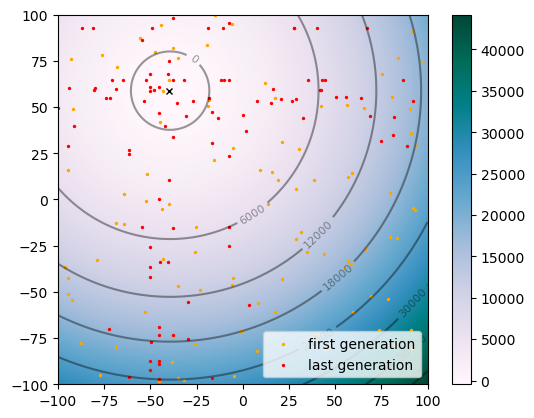

In [8]:
# TEST - IGNORE

## plot from blog 

boundT = 2*bound

# initialise two 2D arrays to represent the x and y coordinates for the graph of the function from optproblems 
x, y = np.array(np.meshgrid(np.linspace(-bound,bound,boundT), np.linspace(-bound,bound,boundT)))

# creates a 2D array to store the function result to be graphed 
z = np.zeros([boundT, boundT])


for i in range(boundT):                                             # for every row 
  for j in range(boundT):                                           # for every element
    plotSoln = optproblems.Individual(np.array([x[i][j], y[i][j]])) # create a solution using the coordinates
    func.evaluate(plotSoln)                                         # evaluate the solution
    z[i][j] = plotSoln.objective_values                             # add the evaluation of the solution to z

popSize = len(gen1)                                                 # get the population size

# set up arrays for scattering the first and final generations on the graph
xFirst = np.zeros(popSize)                                          
yFirst = np.zeros(popSize)
xFinal = np.zeros(popSize) 
yFinal = np.zeros(popSize)

# get the coordinates for the first generation 
for i in range(popSize):
  xFirst[i] = gen2[i].phenome[0]
  yFirst[i] = gen2[i].phenome[1]

# get the coordinates for the last generation 
for i in range(popSize):
  xFinal[i] = gen1[i].phenome[0]
  yFinal[i] = gen1[i].phenome[1]

# get the coordinates of the optimal(smallest) point on the function
x_min = x.reshape(-1)[z.argmin()]     # flatten the array of x coordinates and find the value with the same index as to the smallest value of z 
y_min = y.reshape(-1)[z.argmin()]     # flatten the array of y coordinates and find the value with the same index as to the smallest value of z 

# adjust the size of the plot in inches 
#plt.figure(figsize=(8,6))

# plot the image of the function from optproblems within the bounds supplied 
plt.imshow(z, extent=[-bound, bound, -bound, bound], origin='lower', cmap='PuBuGn', alpha=1)

# display the colourbar to illustrate the depth (z)
plt.colorbar()

# plot the optimal solution with a black x
plt.plot([x_min], [y_min], marker='x', markersize=5, color="black")

# plot the contours of the function 
contours = plt.contour(x, y, z, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

# plot the coordinates which represent the solutions from the first generation 
plt.scatter(xFirst, yFirst, 2, c="orange", label="first generation")

# plot the coordinates which represent the solutions from the last generation 
plt.scatter(xFinal, yFinal, 2, c="red", label="last generation")

# show the legend
plt.legend()

# show the graph
plt.show()

In [9]:
# TEST - IGNORE

c = float('inf')
if 1 < c:
  print("lol")

lol


In [10]:
# fucking around with optproblems - IGNORE

#optSoln = [1, 2, 2, 5, 1]
#seed()
value = []
## generate random numbers between 0-1
for _ in range(50):
	value.append(round((random()*200 - 100), 4))

#print("1", value)
ar = np.array(value)
solnInd = optproblems.Individual(value)

#out = sphere(optSoln)

#print(out)
func = cec2005.F1(50)
ans = func.get_optimal_solutions()
#print("2", ans[0])
optSoln = ans[0].phenome
#print("3 opt soln", optSoln)


def compare(optSoln, actSoln):
  if optSoln == actSoln:
    return 0
  r = 0
  for i in range(len(optSoln)):
    r += abs(optSoln[i] - actSoln[i])
  return r

#func.evaluate(ans[0])
#print("3.5", ans[0].phenome)

#lol = ans[0]
#print("4", lol.phenome)
#lol.phenome.pop(-1)
#lol.phenome.append(-8.0)
#print("5", lol.phenome)
#print(ans)

#lool = optproblems.Individual(lol.phenome)
#print("6", lool.phenome)
#
#print("7", ans[0].objective_values)
#func.evaluate(ans[0])
#print("8", ans[0].phenome)
#print("9", ans[0].objective_values)
#func.evaluate(lol)
#print("10", lol.phenome)
#print("11", lol.objective_values)
#func.evaluate(lool)
#print("12", lool.phenome)
#print("13", lool.objective_values)
#func.evaluate(solnInd)
#print("14", solnInd.phenome)
#print("15", solnInd.objective_values)

#print(abs(ans[0].objective_values - solnInd.objective_values))
#print(compare(optSoln, value))

def fitnessOpt2(gen1, dim, func):
  ans = func.get_optimal_solutions()
  optSoln = ans[0]
  func.evaluate(optSoln)
  fit2 = []
  #print()
  for i in range(len(gen1)):
    indivSoln = optproblems.Individual(gen1[i])
    func.evaluate(indivSoln)
    sum = abs(indivSoln.objective_values - optSoln.objective_values)
    for j in range(len(gen1[0])):
      sum += abs(indivSoln.phenome[j] - optSoln.phenome[j])
    fit2.append(sum)
  return fit2



def fitnessOpt(gen1, dim, func):
  ans = func.get_optimal_solutions()
  optSoln = ans[0]
  func.evaluate(optSoln)
  fit2 = []
  #print()
  for i in range(len(gen1)):
    #print(i)
    #print(gen1[0])
    solnInd = optproblems.Individual(gen1[i])
    #print(solnInd.phenome)
    func.evaluate(solnInd)
    #print(optSoln.phenome)
    fit2.append(abs(optSoln.objective_values - solnInd.objective_values))
  return fit2

def tourSelOpt(gen, k, fit):
  popSize = len(gen)
  pf = []
  pg = []
  
  for j in range(popSize):                        # get a new parent population 
    best = -1
    bestIndex = -1
    newRandIndex = []
    for i in range(k):                            # for each soln in selection k 
      index = randint(0, len(fit)-1)         # get random soln from generation
      if newRandIndex.count(index):               # make sure there are no duplicates in the selection
        i -= 1                                    # if there is pick a new index 
      else:
        newRandIndex.append(index)                   # add index of this solution to list of indexs for this selection 
        if best >= fit[index]:          # checks if it is the fittest solution in the selection
          best = fit[index]             # makes it the new best fitness
          bestIndex = index             # remembers the new best index
    pf.append(fit[bestIndex])           # add the best fitness of the selection to list of parents
    pg.append(gen[bestIndex])           # add the best solution of the selection to list of parents 

  return pg, pf    

genT = [[1.0, 2.0, 3.0, 4.0, 5.0], [1.0, 2.0, 3.0, 4.0, 5.0], [1.0, 2.0, 3.0, 4.0, 5.0]]
dim = 1
func = cec2005.F4(5)

f = fitnessOpt(genT, 3, func)

print(f)



[43283.16138335514, 61605.09496613266, 52606.64072251258]


In [11]:
# TEST - IGNORE

popSize = 100
length = 2
gen1 = createGen(popSize, length, 100)
gen2 = gen1
print(gen1)
#optSoln = [0, 0, 0, 0, 0]
func = optproblems.cec2005.F1(2)  
optS = func.get_optimal_solutions()
print(optS[0].phenome)
func.evaluate(optS[0])
print(optS[0].objective_values)
maxGen = 20000
i = 0
fit1 = []
print(fit1)
while i<= maxGen and gen1.count(optSoln)==0:
  #gen1.pop(-1)
  #gen1.append(optSoln)
  fit1 = fitnessOpt2(gen1, 100, func)              #get fitness using libary 
  pg1, pf1 = tourSelOpt(gen1, 5, fit1)            #tournament selection 
  ng = onePtrCrs(pg1, 3)                          #crossover
  mg = mutate(ng, 100)                            #mutate
  gen1 = mg
  i += 1                                          #increment counter 
  
  if gen1.count(optSoln):                         # if optimum solution has been found
    print(i)
    print(gen1)
    print(fit1)
    print("soln found")
  elif i>maxGen:                                  # if max number of generations has been reached
    print(i)
    print(gen1)
    print(fit1)
    print("max gen reached")
  

NameError: name 'createGen' is not defined

In [ ]:
## TEST - IGNORE
## plot from blog 

x, y = np.array(np.meshgrid(np.linspace(-100,100,200), np.linspace(-100,100,200)))

#print(x)

z = np.zeros([len(x), len(x[0])])

#print(z)

plotPhenome = np.zeros([200])

#print(plotPhenome)




for i in range(len(x)):
  #print(i)
  for j in range(len(x[i])):
    #print(i)
    plotPhenome2 = np.array([x[i][j], y[i][j]])
    #print(plotPhenome2)
    #pass
    plotSoln = optproblems.Individual(plotPhenome2)
    func.evaluate(plotSoln)
    #print(plotSoln.objective_values)
    z[i][j] = plotSoln.objective_values

#print(z)

x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]
plt.figure(figsize=(8,6))
plt.imshow(z, extent=[-100, 100, -100, 100], origin='lower', cmap='viridis', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

plt.scatter(x0, y0, z0, 20)
plt.show()

: 

In [ ]:
# PRE CLASS FUNCTIONS - IGNORE

#  ans = func.get_optimal_solutions()
#  optSoln = ans[0]
#  func.evaluate(optSoln)
#  fit2 = []
#  popSize = len(gen1)
#  #print()
#  for i in range(popSize):
#    func.evaluate(gen[i])
#    sum = abs(gen[i].objective_values - optSoln.objective_values)
#    for j in range(len(gen1[0])):
#      sum += abs(gen[i].phenome[j] - optSoln.phenome[j])
#    fit2.append(sum)
#  return fit2


#def fitness(gen, optSoln):      # temp method to evaluate fitness
#  fit = []
#  for i in range(len(gen)):
#    fit2 = 0
#    c = len(gen[0])
#    for j in range(c):
#      if gen[i][j] != optSoln[j]:
#        fit2 += abs(gen[i][j] - optSoln[j])
#      #if gen[i][j] == optSoln[j]:
#      #  fit2 += 1
#    fit.append(fit2)
#  #for i in range(len(gen)):
#    #fit.append(compare(optSoln, gen[i]))
#  return fit

#fit1 = fitness(gen1, optSoln)

#print(fit1)

#def tourSel(k, fit, gen):
#  popSize = len(gen)
#  pf = []
#  pg = []
#  
#  for j in range(popSize):                        # get a new parent population 
#    best = -1
#    bestIndex = -1
#    newRandIndex = []
#    for i in range(k):                            # for each soln in selection k 
#      index = randint(0, len(fit)-1)         # get random soln from generation
#      if newRandIndex.count(index):               # make sure there are no duplicates in the selection
#        i -= 1                                    # if there is pick a new index 
#      else:
#        newRandIndex.append(index)                   # add index of this solution to list of indexs for this selection 
#        if best <= fit[index]:          # checks if it is the fittest solution in the selection
#          best = fit[index]             # makes it the new best fitness
#          bestIndex = index             # remembers the new best index
#    pf.append(fit[bestIndex])           # add the best fitness of the selection to list of parents
#    pg.append(gen[bestIndex])           # add the best solution of the selection to list of parents 
#
#  return pg, pf    

#pg1, pf1 = tourSel(4, fit1, gen1)

#print(pf1)
#print(pg1)   
#



#def onePtrCrs(pg, crsPt):             # specify how much of the parent you want left behind
#  popSize = len(pg)
#  ng = []                             # list to hold children

#  for i in range(0, popSize-1, 2):    # for each pair of parents
#    newStart1 = pg[i][0:crsPt]        # get start of first parent
#    newStart2 = pg[i+1][0:crsPt]      # get start of second parent#
#
#    newEnd1 = pg[i][crsPt::]          # get end of first parent
#    newEnd2 = pg[i+1][crsPt::]        # get end of second parent ##
#
#    ng.append(newStart1 + newEnd2)    # create child with start of first parent and end of second parent
#    ng.append(newStart2 + newEnd1)    # create child with start of second parent and end of first parent#

#  return ng                           # return new child generation 

#ng = onePtrCrs(pg1, 1)
#print(ng)

#def mutate(ng, dim):
#  for i in range(len(ng)-1):
#    ng[i][randint(0, len(ng[i])-1)] = round((random()*2*dim - dim), 4) # must it ensure the child always be mutated?
#
#  return ng

#mg = mutate(ng, 1)
#print(mg)



: 